# CE-40957: Reinforcement Learning
## HW1

*Full name:*

*Student number:* 

In this notebook, you will learn about reinforcement learning and its implementation in OpenAI Gym environments. 


This notebook is intended to provide hands-on experience with implementing reinforcement learning algorithms and evaluating their performance. By working through the code and examples, you will gain a deeper understanding of how Q-learning and monte carlo method works and how it can be applied to real-world problems.

# 1. Q-learning

In [7]:
!pip install gym[toy_text]
import gym
import numpy as np
from tqdm import trange 
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
clear_output()

## Gym OpenAI Environments
`gym` is a library developed by OpenAI that provides a suite of environments for developing and comparing reinforcement learning algorithms. Each environment has a well-defined observation space and action space, as well as a reset function that returns the environment to its initial state.

The main steps involved in training an agent in a `gym` environment are:

1. Initialize the environment
2. Reset the environment to its initial state
3. Take an action in the current state
4. Observe the new state and reward
5. Update the agent's policy based on the observed reward and new state
6. Repeat steps 3 to 5 until the environment returns a "done" signal

Once the agent has learned a good policy, it can be evaluated by running it in the environment for several episodes and measuring its average reward.

### FrozenLake environment
The `FrozenLake-v1` environment is a variant of the classic reinforcement learning problem where the agent must navigate a grid while avoiding obstacles. 

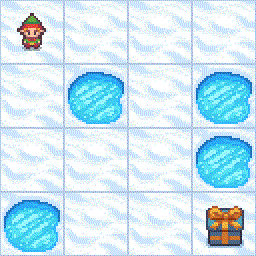


* **Observation Space:** The observation space of the environment is a grid representing the state of the lake.
* **Action Space:** The agent has four possible actions at each time step: move up, move down, move left, or move right.
* **Goal:** The goal of the agent is to reach the goal state while avoiding holes in the ice.
* **Reward:** Reach goal(G): +1 , Reach hole(H): 0 , Reach frozen(F): 0
* **Episode Termination:** The environment signals the end of an episode with a "done" signal.


In [8]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4")
spec = gym.spec('FrozenLake-v1')

print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")

Action Space: Discrete(4)
Observation Space: Discrete(16)
Max Episode Steps: 100
Nondeterministic: False
Reward Range: (0, 1)
Reward Threshold: 0.7



/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [9]:
Actions =  {0: 'LEFT', 
            1: 'DOWN',
            2: 'RIGHT',
            3: 'UP'}

RIGHT


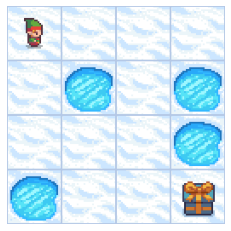

RIGHT --> UP


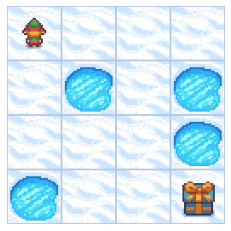

RIGHT --> UP --> DOWN


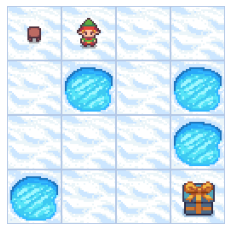

RIGHT --> UP --> DOWN --> DOWN


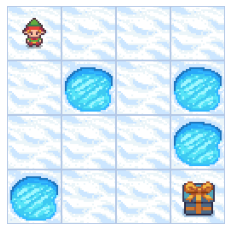

RIGHT --> UP --> DOWN --> DOWN --> UP


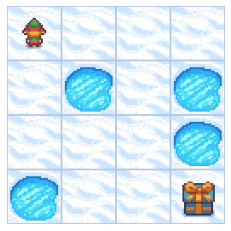

RIGHT --> UP --> DOWN --> DOWN --> UP --> DOWN


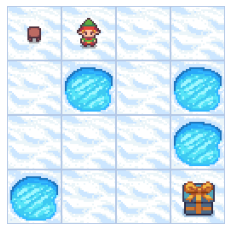

RIGHT --> UP --> DOWN --> DOWN --> UP --> DOWN --> LEFT


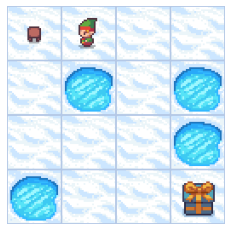

RIGHT --> UP --> DOWN --> DOWN --> UP --> DOWN --> LEFT --> DOWN


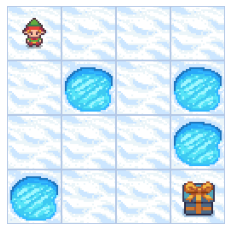

RIGHT --> UP --> DOWN --> DOWN --> UP --> DOWN --> LEFT --> DOWN --> LEFT


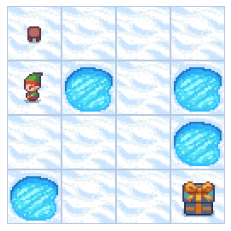

RIGHT --> UP --> DOWN --> DOWN --> UP --> DOWN --> LEFT --> DOWN --> LEFT --> DOWN


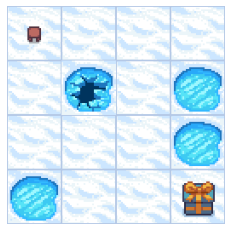

In [14]:
# Be free to test!
# take random actions, and see how the agent moves

env.reset()

action_seq= []

for i in range(10):
  action_number = env.action_space.sample()
  action_seq.append(Actions[action_number])
  env.step(action_number)
  print(' --> '.join(action_seq))
  env_screen = env.render(mode = 'rgb_array')
  plt.imshow(env_screen)
  plt.axis('off');
  plt.show()

## Q-Learning
Q-Learning is a model-free reinforcement learning algorithm that is used to find the optimal policy for an agent in an environment. It is based on the idea of updating an estimate of the optimal action-value function using the Bellman equation. The optimal action-value function is defined as the maximum expected reward that an agent can receive by taking an action a in a state s and following the optimal policy thereafter.

The action-value function Q(s,a) is updated iteratively as follows:

$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right) $$

where ‍‍‍‍‍`r` is the reward received after taking action a in state `s`, `s'` is the new state, $\gamma$ is the discount factor (a value between 0 and 1 that determines the importance of future rewards), and $\alpha$ is the learning rate (determines the step size at which the value function is updated).

In [ ]:
def epsilon_greedy(Q, state, epsilon, n):
  u = np.random.rand()
  if u < epsilon:
    return np.random.randint(low=0, high=n)
  else:
    return np.random.choice(np.flatnonzero(Q[state] == Q[state].max()))
  
def q_learning(env, num_episodes, alpha, gamma, epsilon):
    # Initialize the action-value function Q(s,a)
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    
    s = 0
    print_step = 1000
    expected_reward = 0
    expected_ep_length = 0
    expected_success_rate = 0
    rewards = []
    ep_lengths = []
    success_rate = []
    max_epsilon = epsilon

    # Loop over each episode
    for episode in range(num_episodes):
      epsilon = max_epsilon / (episode//10000 + 1) 
      state = env.reset()
      # ==================================== Your Code (Begin) ====================================
      step = 0
      exp_reward = 0
      g = 1
      done = False
      while not done:
        u = np.random.rand()
        action = epsilon_greedy(Q, state, epsilon, env.action_space.n)
        next_state, reward, done, _ = env.step(action)
        # if reward > 0:
        #   print(reward, next_state)
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
        state = next_state
        exp_reward += g * reward
        g *= gamma
        if done:
          expected_success_rate += reward
        step += 1
      expected_reward += exp_reward
      expected_ep_length += step
      # ==================================== Your Code (End) ====================================
      s += 1
      if s % print_step == 0:
        print(f'{s//print_step}K episodes passed: Eps={epsilon}')
        print(expected_reward / print_step, expected_ep_length / print_step, expected_success_rate / print_step)
        rewards.append(expected_reward / print_step)
        expected_reward = 0
        ep_lengths.append(expected_ep_length / print_step)
        expected_ep_length = 0
        success_rate.append(expected_success_rate / print_step)
        expected_success_rate = 0
        print('\n-----------------------------------\n')
    return Q, rewards, ep_lengths, success_rate

In [ ]:
# change the parameters if needed
n_episodes = 1000000
alpha = 0.3
gamma = 0.95
epsilon = 0.5

In [ ]:
Q_ql, r_ql, ep_ql, sr_ql = q_learning(env, n_episodes, alpha, gamma, epsilon)


1K episodes passed: Eps=0.5
0.014652160111966316 10.249 0.033

-----------------------------------

2K episodes passed: Eps=0.5
0.026126617305285656 11.24 0.052

-----------------------------------

3K episodes passed: Eps=0.5
0.02753022135691898 11.381 0.056

-----------------------------------

4K episodes passed: Eps=0.5
0.021582270438476478 11.461 0.044

-----------------------------------

5K episodes passed: Eps=0.5
0.029821252011377624 11.593 0.059

-----------------------------------

6K episodes passed: Eps=0.5
0.03408679792958543 11.47 0.068

-----------------------------------

7K episodes passed: Eps=0.5
0.02910099084190262 11.389 0.061

-----------------------------------

8K episodes passed: Eps=0.5
0.024349292763426757 10.993 0.046

-----------------------------------

9K episodes passed: Eps=0.5
0.03078794467453809 11.477 0.06

-----------------------------------

10K episodes passed: Eps=0.5
0.024782535591856586 11.255 0.051

-----------------------------------

11K ep

In [ ]:
Q_ql

array([[0.11150432, 0.1103866 , 0.11539463, 0.1120232 ],
       [0.07119327, 0.03391039, 0.0563521 , 0.11074141],
       [0.06028538, 0.09580643, 0.04671841, 0.06744486],
       [0.0259148 , 0.03950766, 0.04469741, 0.10148889],
       [0.13891904, 0.10580913, 0.10024936, 0.0862509 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.01368418, 0.00357611, 0.15880994, 0.00669439],
       [0.        , 0.        , 0.        , 0.        ],
       [0.07195115, 0.09830387, 0.1439766 , 0.16720843],
       [0.13114487, 0.31118189, 0.09657762, 0.17449988],
       [0.4585915 , 0.06080911, 0.06661344, 0.06379998],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.332003  , 0.06029157, 0.48763036, 0.1274243 ],
       [0.38439776, 0.82422911, 0.33727193, 0.39276203],
       [0.        , 0.        , 0.        , 0.        ]])

Action : RIGHT


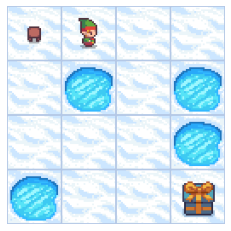

Action : UP


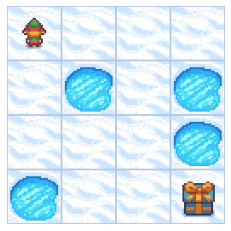

Action : RIGHT


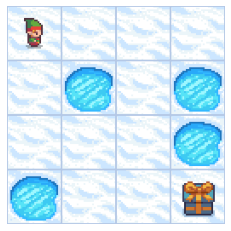

Action : RIGHT


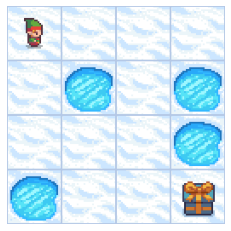

Action : RIGHT


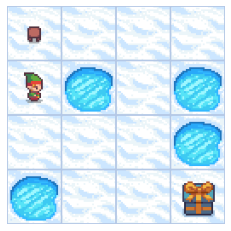

Action : LEFT


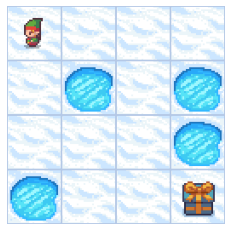

Action : RIGHT


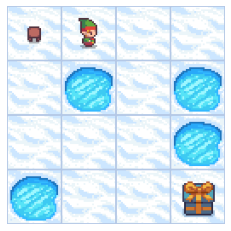

Action : UP


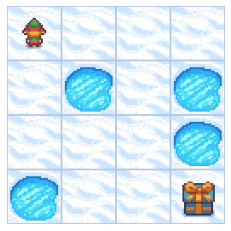

Action : RIGHT


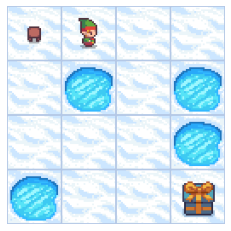

Action : UP


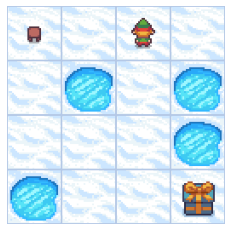

Action : DOWN


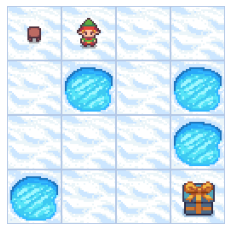

Action : UP


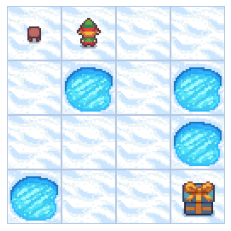

Action : UP


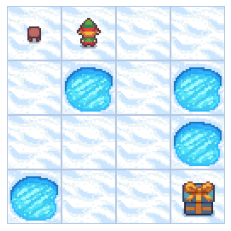

Action : UP


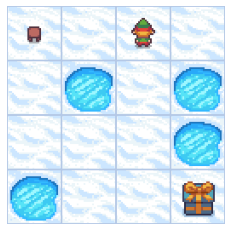

Action : DOWN


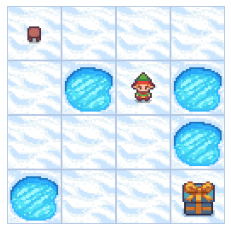

Action : RIGHT


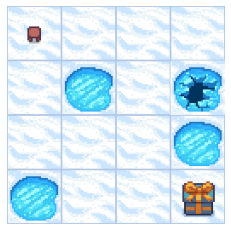

Failed episode
0.0


In [ ]:
# Q = q_learning(env, num_episodes, alpha, gamma)

state = env.reset()
done = False
while not done:
    action = np.argmax(Q_ql[state, :])
    new_state, reward, done, _ = env.step(action)
    print(f'Action : {Actions[action]}')
    env_screen = env.render(mode = 'rgb_array')
    plt.imshow(env_screen)
    plt.axis('off');
    plt.show()
    state = new_state
    if done:
        if reward == 1:
            print("Successful episode!")
        else:
            print("Failed episode")
        print(reward)

## SARSA
SARSA (State-Action-Reward-State-Action) is a popular reinforcement learning algorithm used for finding an optimal policy in an environment. Like Q-learning, SARSA is an off-policy algorithm that updates the values of the Q-table based on the observed rewards and next state-action pairs.

The key difference between SARSA and Q-learning is in the selection of the next action. In SARSA, the next action is selected based on the current policy, whereas in Q-learning, the next action is selected based on the greedy policy. This means that in SARSA, the algorithm is learning about the expected returns from the current policy, whereas in Q-learning, the algorithm is learning about the optimal policy.

Mathematically, the SARSA update rule can be represented as:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t) \right)$$


Where $Q(S_t,A_t)$ is the current estimate of the expected return for taking action $A_t$ in state $S_t$, $\alpha$ is the learning rate, $R_{t+1}$ is the reward received after taking action $A_t$ in state $S_t$, $\gamma$ is the discount factor, and $Q(S_{t+1},A_{t+1})$ is the estimated return for taking action $A_{t+1}$ in the next state $S_{t+1}$.


In [ ]:
from IPython.core.excolors import exception_colors
def sarsa(env, num_episodes, alpha, gamma, epsilon):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    s = 0
    print_step = 1000
    expected_reward = 0
    expected_ep_length = 0
    expected_success_rate = 0
    rewards = []
    ep_lengths = []
    success_rate = []
    max_epsilon = epsilon
    for episode in range(num_episodes):
        epsilon = max_epsilon / (episode//10000 + 1) 
        state = env.reset()
        # ==================================== Your Code (Begin) ====================================
        step = 0
        exp_reward = 0
        g = 1
        done = False
        while not done:
          action = epsilon_greedy(Q, state, epsilon, env.action_space.n)
          next_state, reward, done, _ = env.step(action)
          next_action = epsilon_greedy(Q, next_state, epsilon, env.action_space.n)
          if done:
            Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward)
          else:
            Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action])
          exp_reward += g * reward
          g *= gamma
          if done:
            expected_success_rate += reward
            # if reward == 1:
            #   print(Q, state, next_state, action, next_action)
          step += 1
          state = next_state
        expected_reward += exp_reward
        expected_ep_length += step
        # ==================================== Your Code (End) ====================================
        s += 1
        if s % print_step == 0:
          print(f'{s//print_step}K episodes passed: Eps={epsilon}')
          print(expected_reward / print_step, expected_ep_length / print_step, expected_success_rate / print_step)
          rewards.append(expected_reward / print_step)
          expected_reward = 0
          ep_lengths.append(expected_ep_length / print_step)
          expected_ep_length = 0
          success_rate.append(expected_success_rate / print_step)
          expected_success_rate = 0
          print('\n-----------------------------------\n')
        # if s % (print_step * 100) == 0:
          #print(Q)
    return Q, rewards, ep_lengths, success_rate

In [ ]:
# change the parameters if needed
n_episodes = 1000000
alpha = 0.3
gamma = 0.95
epsilon = 0.5

In [ ]:
Q_sarsa, r_sarsa, ep_sarsa, sr_sarsa = sarsa(env, n_episodes, alpha, gamma, epsilon)

1K episodes passed: Eps=0.5
0.014954064884666043 9.298 0.027

-----------------------------------

2K episodes passed: Eps=0.5
0.01889821694965365 9.71 0.036

-----------------------------------

3K episodes passed: Eps=0.5
0.02889077947396318 9.532 0.055

-----------------------------------

4K episodes passed: Eps=0.5
0.019404607710015363 9.496 0.037

-----------------------------------

5K episodes passed: Eps=0.5
0.02035785275792387 9.699 0.04

-----------------------------------

6K episodes passed: Eps=0.5
0.022952079640922066 10.148 0.045

-----------------------------------

7K episodes passed: Eps=0.5
0.019101122525780872 9.851 0.038

-----------------------------------

8K episodes passed: Eps=0.5
0.024507292958443207 10.008 0.047

-----------------------------------

9K episodes passed: Eps=0.5
0.025623850094966146 9.878 0.049

-----------------------------------

10K episodes passed: Eps=0.5
0.023522976169421526 10.085 0.044

-----------------------------------

11K episode

In [ ]:
Q_sarsa

array([[0.17927692, 0.07110195, 0.16452389, 0.14587458],
       [0.01771213, 0.05158098, 0.04651969, 0.13194865],
       [0.0753614 , 0.12453934, 0.04475102, 0.04947638],
       [0.04696506, 0.01993359, 0.00736828, 0.11677156],
       [0.21851004, 0.15161343, 0.05663003, 0.09293852],
       [0.        , 0.        , 0.        , 0.        ],
       [0.08428838, 0.00310762, 0.09550315, 0.00503452],
       [0.        , 0.        , 0.        , 0.        ],
       [0.08704441, 0.08723168, 0.09675138, 0.26992771],
       [0.15713189, 0.28577694, 0.30304806, 0.09287302],
       [0.22017829, 0.11641274, 0.24252903, 0.06584258],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.34782617, 0.15427201, 0.35219922, 0.18349472],
       [0.47196788, 0.46722304, 0.39236559, 0.47385807],
       [0.        , 0.        , 0.        , 0.        ]])

Action : LEFT


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


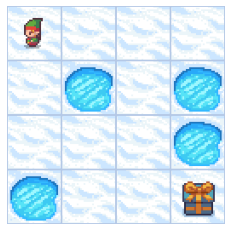

Action : LEFT


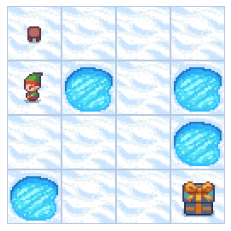

Action : LEFT


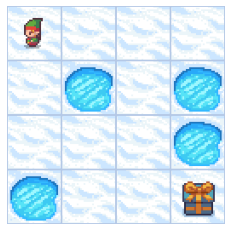

Action : LEFT


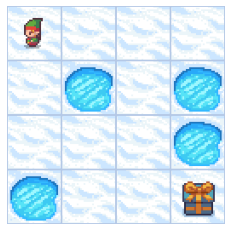

Action : LEFT


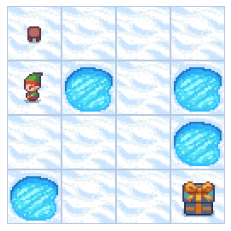

Action : LEFT


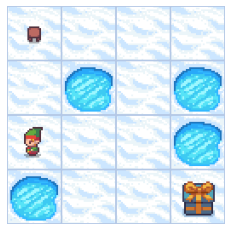

Action : UP


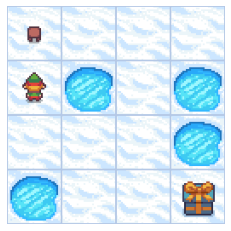

Action : LEFT


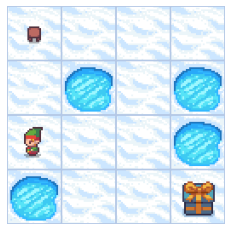

Action : UP


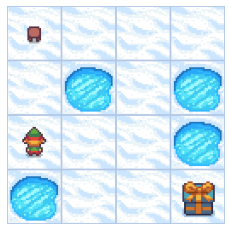

Action : UP


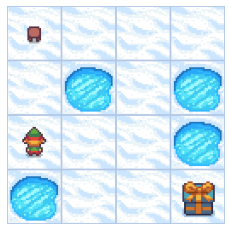

Action : UP


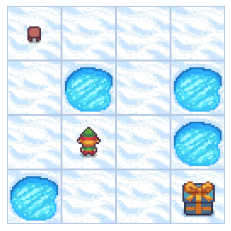

Action : RIGHT


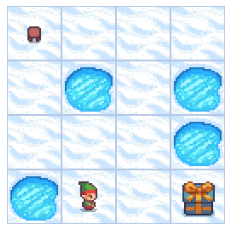

Action : RIGHT


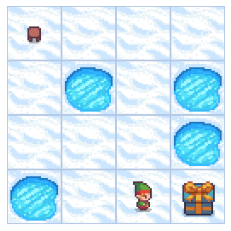

Action : UP


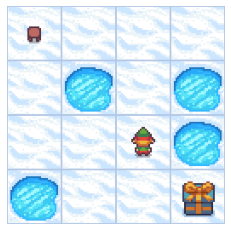

Action : RIGHT


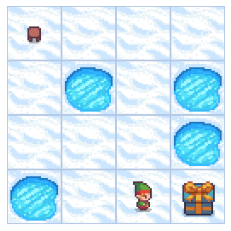

Action : UP


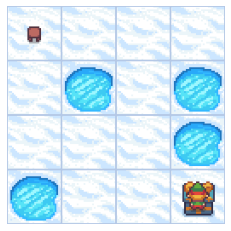

Successful episode!
1.0


In [ ]:
# Q = q_learning(env, num_episodes, alpha, gamma)

state = env.reset()
done = False
while not done:
    action = np.argmax(Q_sarsa[state, :])
    new_state, reward, done, _ = env.step(action)
    print(f'Action : {Actions[action]}')
    env_screen = env.render(mode = 'rgb_array')
    plt.imshow(env_screen)
    plt.axis('off');
    plt.show()
    state = new_state
    if done:
        if reward == 1:
            print("Successful episode!")
        else:
            print("Failed episode")
        print(reward)

## Conclution
Compare these 2 methods based on average return, penalty, episode length and success rate.
In the previous cells, if necessary, store the necessary variables for this comparison and use them in the following block.

Text(0.5, 1.0, 'Expected Reward')

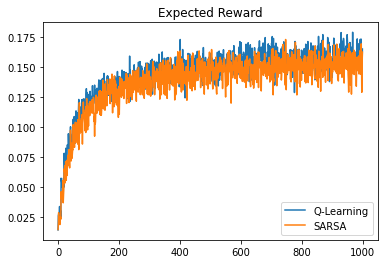

In [ ]:
plt.plot(r_ql, label='Q-Learning')
plt.plot(r_sarsa, label='SARSA')
plt.legend()
plt.title('Expected Reward')

Text(0.5, 1.0, 'Success Rate')

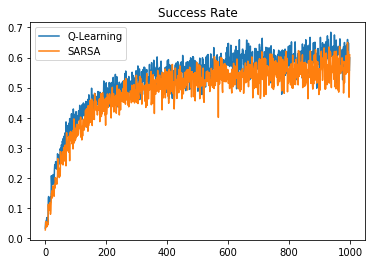

In [ ]:
plt.plot(sr_ql, label='Q-Learning')
plt.plot(sr_sarsa, label='SARSA')
plt.legend()
plt.title('Success Rate')

Text(0.5, 1.0, 'Episode Length')

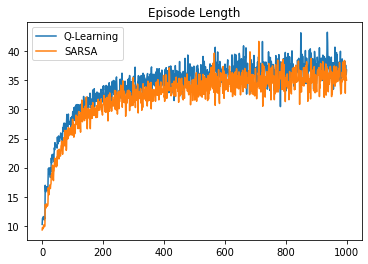

In [ ]:
plt.plot(ep_ql, label='Q-Learning')
plt.plot(ep_sarsa, label='SARSA')
plt.legend()
plt.title('Episode Length')

<br><br><br><br><br><br><br><br><br><br><br><br>

# 2. Monte Carlo method

In this notebook, you will learn about the Monte Carlo method in the context of reinforcement learning.
Your agent will move in the following picture. This is a random walk with two possible actions (`LEFT` and `RIGHT`).
The agent gets a reward of 1 if it reaches the right-most state, and 0 otherwise. You are going to use such an environment with 31 states.

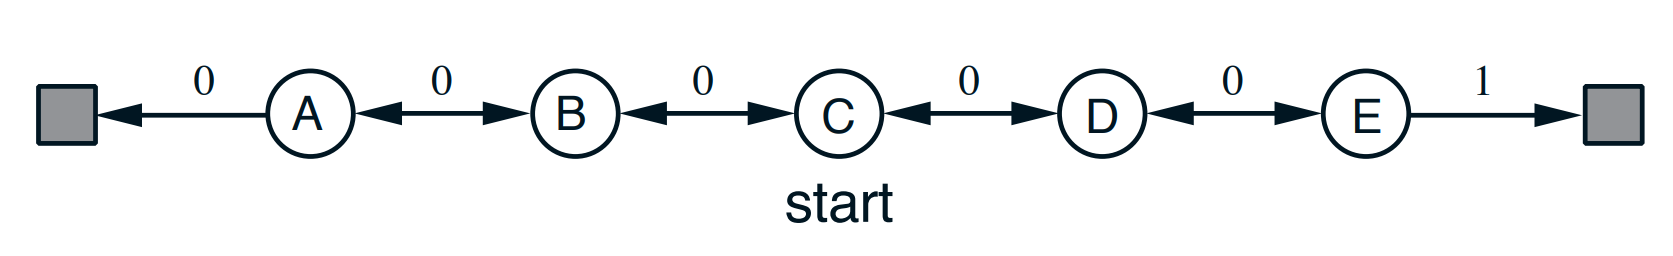

In [3]:
class RandomWalkEnv():
    def __init__(self, num_states=31, start=15, gamma=1):
        self.num_states = num_states
        self.start = start
        self.end = num_states - 1
        self.gamma = gamma
        self.state = None
        self.actions = ['LEFT', 'RIGHT']

    def reset(self):
        self.state = self.start
        return self.state, 0, False

    def step(self, action):
        if self.state == self.end or self.state == 0:
            return self.state, 0, True
        action_direction = 0
        if action == 'RIGHT':
            action_direction = 1
        elif action == 'LEFT':
            action_direction = -1
        else:
            raise 'Invalid action. Choose from {"LEFT", "RIGHT"}.'

        self.state += action_direction
        reward, done = 0, False
        if self.state == self.end:
            reward, done = 1, True
        elif self.state == 0:
            done = True
        return self.state, reward, done

    def get_true_values(self):
        values = [0] * self.num_states
  
        values[self.end - 1] = 1
        for i in range(self.end - 1, 1, -1):
            values[i - 1] = self.gamma * values[i]
        
        return values

The Monte Carlo method is a reinforcement learning technique for estimating the value function of a Markov decision process (MDP). It involves generating multiple episodes by following a given policy and computing the returns (sum of rewards) for each state-action pair. The value of a state-action pair is then estimated as the average of the returns obtained from that pair over multiple episodes.

The formula for updating the value function using the Monte Carlo method is:

\begin{equation}
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \frac{1}{N(S_t,A_t)} \sum_{i=1}^{N(S_t,A_t)}(G_i - Q(S_t,A_t))
\end{equation}

where $Q(S_t,A_t)$ is the estimated value of the state-action pair $(S_t,A_t)$, $N(S_t,A_t)$ is the number of times the state-action pair has been visited, $G_i$ is the return obtained from the $i$th visit to the state-action pair, and the sum is taken over all $N(S_t,A_t)$ visits.

To implement the Monte Carlo method, you need to define the environment, the policy, and the number of episodes to simulate. At each step of the episode, you observe the state, take an action according to the policy, and observe the reward and the next state. You then update the value function using the formula above. As more episodes are generated, the value estimates become more accurate.

In [4]:
def MC(env, num_episodes, alpha=0.1):
    # ==================================== Your Code (Begin) ====================================
    values = np.zeros(env.num_states)
    returns = [[] for _ in range(env.num_states)]
    errors = []
    for episode in range(num_episodes):
        states = []
        rewards = []
        state, _, done = env.reset()
        while not done:
            action = np.random.choice(env.actions)
            next_state, reward, done = env.step(action)
            states.append(state)
            rewards.append(reward)
            state = next_state
        G = 0
        for t in reversed(range(len(states))):
            state = states[t]
            reward = rewards[t]
            G = env.gamma * G + reward
            if state not in states[:t]:
                idx = state - 1
                returns[idx].append(G)
                old_value = values[idx]
                values[idx] += alpha * (np.mean(returns[idx]) - old_value)
        error = np.sqrt(np.sum(np.power(values - env.get_true_values(), 2)) / env.num_states)
        errors.append(error)

    # ==================================== Your Code (End) ====================================
    return values, errors

### Visualization

**Part 1: Examining the effect of the alpha parameter on RMSE**

For each alpha, you must run `num_runs` times.
In your plot, you should show the average RMSE of these `num_runs` times.

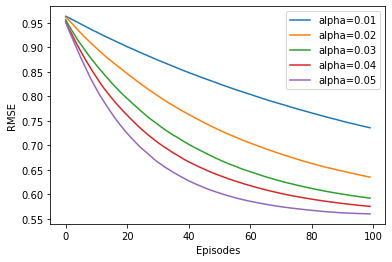

In [3]:
# Visualization

import matplotlib.pyplot as plt
import numpy as np

env = RandomWalkEnv()
num_episodes = 100
alphas = [0.01, 0.02, 0.03, 0.04, 0.05]
num_runs = 100

for alpha in alphas:
  # ==================================== Your Code (Begin) ====================================
    rmse_avg = np.zeros(num_episodes)
    for run in range(num_runs):
        values, errors = MC(env, num_episodes, alpha)
        rmse_avg += np.array(errors)
    rmse_avg /= num_runs
    plt.plot(range(num_episodes), rmse_avg, label=f'alpha={alpha}')
  # ==================================== Your Code (End) ======================================
  
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('RMSE')
plt.show()

# The following sections are missed in the published version of question notebook, but I include them in the solution because I think they can give you good intuition.

**Part 2: Examining the effect of the env size on RMSE**

For each env size, you must run num_runs times.
In your plot, you should show the average RMSE of these num_runs times.
In all runs, your start point must be the center of environment.

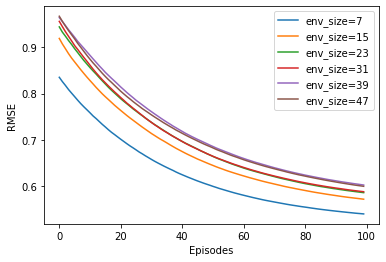

In [5]:
num_episodes = 100
alpha = 0.03
num_runs = 100

import matplotlib.pyplot as plt
import numpy as np

# Define the different sizes of the environment to compare
env_sizes = [7, 15, 23, 31, 39, 47]

for size in env_sizes:
  # ==================================== Your Code (Begin) ====================================
    env = RandomWalkEnv(num_states=size, start=(size // 2), gamma=1)

    rmse_avg = np.zeros(num_episodes)
    for run in range(num_runs):
        values, errors = MC(env, num_episodes, alpha)
        rmse_avg += np.array(errors)
    rmse_avg /= num_runs

    # Plot the RMSE for each size of the environment
    plt.plot(range(num_episodes), rmse_avg, label=f'env_size={size}')
    
  # ==================================== Your Code (End) ====================================
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('RMSE')
plt.show()

**Part 3: Examining variance of MC method in different runs**

It is necessary to draw different figures for each `env_sizes`.

Take `num_runs` different runs on each and plot the results on the corresponding figure.

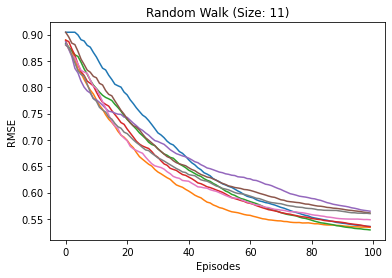

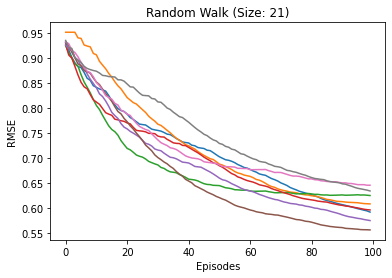

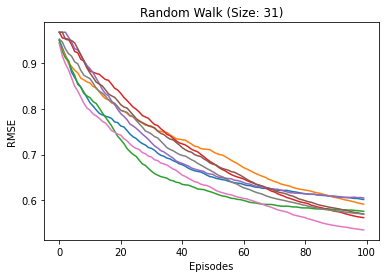

In [6]:
import matplotlib.pyplot as plt
import numpy as np

env_sizes = [11, 21, 31]
num_episodes = 100
num_runs = 8

for size in env_sizes:
  # ==================================== Your Code (Begin) ====================================
    env = RandomWalkEnv(num_states=size, start=size//2, gamma=1)
    for run in range(num_runs):
        rmse_avg = np.zeros(num_episodes)
        _, errors = MC(env, num_episodes, alpha)
        rmse_avg = np.array(errors)
        plt.plot(range(num_episodes), rmse_avg)
  # ==================================== Your Code (Begin) ====================================

    plt.title(f'Random Walk (Size: {size})')
    plt.xlabel('Episodes')
    plt.ylabel('RMSE')
    plt.show()